# **Detecting AI-Generated Text using Transformer Models**

This project explores the use of state-of-the-art transformer-based deep learning models to detect whether a given essay or text was written by a human or generated by AI. With the rise of large language models, distinguishing between authentic and machine-generated content has become increasingly important in academic and professional domains.

## 📌 Objectives
- Clean and preprocess textual data using NLP techniques.
- Fine-tune a pre-trained transformer model (`DistilGPT2`) for binary sequence classification.
- Train the model to classify texts as either human-written or AI-generated.
- Evaluate performance using classification metrics and confusion matrices.
- Generate predictions on unseen test data and save submission-ready outputs.

## 📂 Dataset
The dataset consists of two CSV files:
- **Training Data**: A mixed set of human-written and AI-generated essays, labeled accordingly.
- **Test Data**: A set of unlabeled essays used for final prediction and evaluation.

## 🛠️ Key Technologies
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Natural Language Toolkit (NLTK)
- HuggingFace Transformers (`DistilGPT2`, `AutoTokenizer`, `AutoModelForSequenceClassification`)
- PyTorch for model training and optimization
- Scikit-learn for data splitting and evaluation

---

This notebook walks through the full pipeline — from data loading and cleaning to training, evaluation, and final inference — offering a practical demonstration of how transformer models can be applied to real-world classification tasks involving generative text.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
# Import AdamW from torch.optim instead of transformers.optimization
from torch.optim import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

'Copy of Meghana and Mounika- llm-detect-ai-generated-text.ipynb'
'Final BERT Copy of Meghana and Mounika- llm-detect-ai-generated-text.ipynb'
 final_test.csv
'generative transforms'
'Meghana and Mounika- llm-detect-ai-generated-text.ipynb'
'Mixed Dataset 1.csv'
'Mixed dataset.csv'
'Mixed dataset.gsheet'
 submission.csv
 submission.gsheet
'Testing Data 1.csv'
'Testing dataset (1).gsheet'
'Testing dataset (2).gsheet'
'Testing dataset.csv'
'Testing dataset.gsheet'
'Training_Essay_Data (1).gsheet'
 Training_Essay_Data.csv
 Training_Essay_Data.gsheet
 Untitled
 Untitled0.ipynb


In [ ]:
# Load the training and testing datasets
train_essays = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mixed Dataset 1.csv")
test_essays = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Testing Data 1.csv")

In [ ]:
print(train_essays.head())
print(test_essays.head())

                                                text  generated
0  Cars. Cars have been around since they became ...          0
1  Transportation is a large necessity in most co...          0
2  "America's love affair with it's vehicles seem...          0
3  How often do you ride in a car? Do you drive a...          0
4  Cars are a wonderful thing. They are perhaps o...          0
                                                text  label
0  Phones and Driving\n\nEveryday people die beca...      0
1  Phones & Driving\n\nTeens, adults, and even of...      0
2  Phones and Driving\n\nEach year phones are get...      0
3  cellphones and driving\n\nCellphones and drivi...      0
4  Texting and Driving\n\nThousands of people die...      0


In [ ]:
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       4022 non-null   object
 1   generated  4022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.0+ KB


In [ ]:
test_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4100 non-null   object
 1   label   4100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.2+ KB


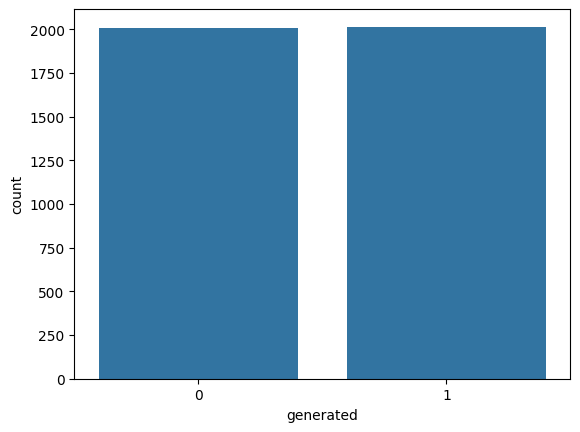

In [ ]:
# Check for class balance
sns.countplot(data=train_essays, x='generated')
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    words = text.split()  # Tokenize
    words = [word.lower() for word in words if word.isalpha()]  # Lowercase and remove non-alphabetic words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

train_essays['clean_text'] = train_essays['text'].apply(clean_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_essays['clean_text'], train_essays['generated'], test_size=0.2, random_state=42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Copy of Meghana and Mounika- llm-detect-ai-generated-text.ipynb'
'Final BERT Copy of Meghana and Mounika- llm-detect-ai-generated-text.ipynb'
 final_test.csv
'generative transforms'
'Meghana and Mounika- llm-detect-ai-generated-text.ipynb'
'Mixed Dataset 1.csv'
'Mixed dataset.csv'
'Mixed dataset.gsheet'
 submission.csv
 submission.gsheet
'Testing Data 1.csv'
'Testing dataset (1).gsheet'
'Testing dataset (2).gsheet'
'Testing dataset.csv'
'Testing dataset.gsheet'
'Training_Essay_Data (1).gsheet'
 Training_Essay_Data.csv
 Training_Essay_Data.gsheet
 Untitled
 Untitled0.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       4022 non-null   object
 1   generated  4022 non-null   int64 
dtypes: int64(1), object(1)
m

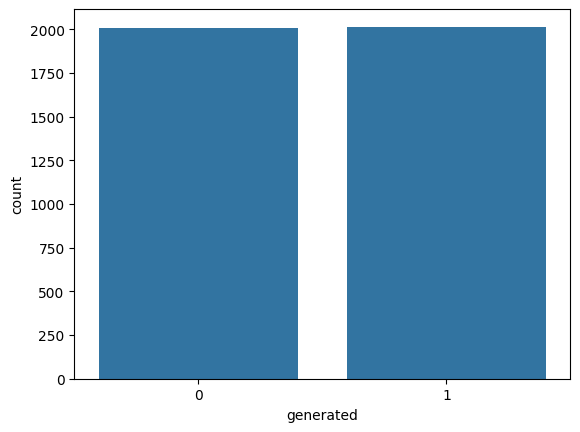

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Average Training Loss: 0.16
Epoch 2/3, Average Training Loss: 0.03
Epoch 3/3, Average Training Loss: 0.02
Accuracy: 0.9975155279503105
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.99      1.00      1.00       387

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



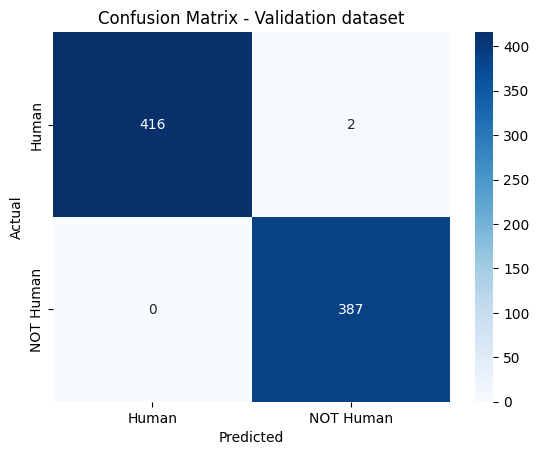

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from nltk.corpus import stopwords
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
# Import AdamW from torch.optim instead of transformers.optimization
from torch.optim import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab Notebooks/"

train_essays = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mixed Dataset 1.csv")
test_essays = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Testing Data 1.csv")

train_essays.info()
test_essays.info()

sns.countplot(data=train_essays, x='generated')
plt.show()

import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    words = text.split()  # Tokenize
    words = [word.lower() for word in words if word.isalpha()]  # Lowercase and remove non-alphabetic words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

train_essays['clean_text'] = train_essays['text'].apply(clean_text)
X_train, X_test, y_train, y_test = train_test_split(train_essays['clean_text'], train_essays['generated'], test_size=0.2, random_state=42)

# Split dataset into train and test sets

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Ensure padding on the right side
# Get the pad token id after setting pad_token
model = AutoModelForSequenceClassification.from_pretrained("distilgpt2", num_labels=2,pad_token_id=tokenizer.pad_token_id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
pad_token_id = tokenizer.pad_token_id
def tokenize_function(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

X_train_tokens = tokenize_function(X_train)
X_test_tokens = tokenize_function(X_test)

train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], torch.tensor(y_train.values))
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], torch.tensor(y_test.values))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define model


# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.2f}")

# Evaluate model
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print(f'Accuracy: {accuracy}')
print(classification_report(y_true, y_pred))
labels = ['Human', 'NOT Human']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation dataset')
plt.show()


   id     generated
0   0  6.549379e-07
1   0  3.284540e-06
2   0  3.737085e-06
3   0  1.650321e-06
4   0  8.697385e-07


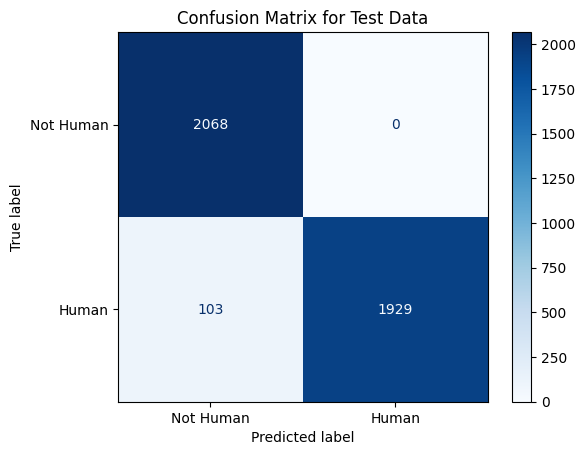

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

batch_size = 16  # Adjust batch size as needed
predictions = []

for i in range(0, len(test_essays), batch_size):
    batch_texts = test_essays['text'][i:i + batch_size].tolist()
    test_inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt')

    # Move input tensor to the same device as the model
    test_inputs = {key: value.to(device) for key, value in test_inputs.items()}

    with torch.no_grad():
        outputs = model(**test_inputs)
        logits = outputs.logits

    batch_predictions = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()
    predictions.extend(batch_predictions)

# Create a submission DataFrame with essay IDs and corresponding predictions
submission = pd.DataFrame({
    'id': test_essays['label'],
    'generated': predictions
})
print(submission.head())
# Save the submission DataFrame to a CSV file
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv', index=False)

# Get actual labels for test data
y_true_test = test_essays['label'].values


# Convert predictions to binary (0 or 1) using a threshold (e.g., 0.5)
predictions_binary = (np.array(predictions) >= 0.5).astype(int) #converts probabilities to 0 or 1

# Create confusion matrix for test data using binary predictions
cm_test = confusion_matrix(y_true_test, predictions_binary, labels=[0, 1])

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Human', 'Human'])
disp_test.plot(cmap='Blues')

plt.title("Confusion Matrix for Test Data")
plt.show()